In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from functions import aux_functions

## Read Dataset

In [2]:
hardbounce = pd.read_csv('datasets/hardbounce_sample.csv',sep=';')

In [3]:
hardbounce.shape

(500000, 4)

In [4]:
hardbounce.dtypes

email             object
flgHardBounce    float64
regDate           object
birthDate         object
dtype: object

## Remove rows with Y variable missing

In [5]:
aux_functions.percMissing(hardbounce)

,col,perc_missing
1,flgHardBounce,3.3208
0,email,0.0000
2,regDate,0.0000
3,birthDate,0.0000


In [6]:
# Made a dataframe copy to avoid chaining operations warnings
# https://www.dataquest.io/blog/settingwithcopywarning/
hardbounce_2 = hardbounce[hardbounce['flgHardBounce'].notnull()].copy()

In [7]:
aux_functions.percMissing(hardbounce_2)

,col,perc_missing
0,email,0.0
1,flgHardBounce,0.0
2,regDate,0.0
3,birthDate,0.0


In [8]:
hardbounce_2.shape

(483396, 4)

## Convert Datatypes

In [9]:
hardbounce_2['flgHardBounce_n'] = hardbounce_2.flgHardBounce.astype(int)

In [10]:
hardbounce_2['regDate_n'] = pd.to_datetime(hardbounce_2['regDate'])

In [11]:
hardbounce_2['birthDate_n'] = pd.to_datetime(hardbounce_2['birthDate'], errors = 'coerce')

In [12]:
hardbounce_2.dtypes

email                      object
flgHardBounce             float64
regDate                    object
birthDate                  object
flgHardBounce_n             int64
regDate_n          datetime64[ns]
birthDate_n        datetime64[ns]
dtype: object

## Threat invalid register dates

Dates before 1950-01-01 will be considered missing

In [13]:
len(hardbounce_2[hardbounce_2['regDate_n'] <= '1950-01-01'])

519

In [14]:
hardbounce_2.loc[hardbounce_2.regDate_n <= '1950-01-01', 'regDate_n'] = pd.NaT

In [15]:
len(hardbounce_2[hardbounce_2['regDate_n'].isnull()])

519

## Threat invalid birth dates

Dates before 1919-01-01 will be considered missing

In [16]:
len(hardbounce_2[hardbounce_2['birthDate_n'] <= '1919-01-01'])

79419

In [17]:
hardbounce_2.loc[hardbounce_2.birthDate_n <= '1919-01-01', 'birthDate_n'] = pd.NaT

In [18]:
len(hardbounce_2[hardbounce_2['birthDate_n'].isnull()])

79535

## Calculate time since registration

In [19]:
from datetime import date

curr_date = pd.to_datetime(date.today())

In [20]:
hardbounce_2['monthsSinceRegDate'] = (curr_date - hardbounce_2['regDate_n']) / np.timedelta64(1, 'M')

In [21]:
# There are rows with monthsSinceRegDate missing
aux_functions.percMissing(hardbounce_2)

,col,perc_missing
6,birthDate_n,16.453384
5,regDate_n,0.107365
7,monthsSinceRegDate,0.107365
0,email,0.000000
1,flgHardBounce,0.000000
2,regDate,0.000000
3,birthDate,0.000000
4,flgHardBounce_n,0.000000


In [22]:
# There are rows with months less than 1
hardbounce_2['monthsSinceRegDate'][hardbounce_2['monthsSinceRegDate'].notnull()].astype(int).describe()

count    482877.000000
mean         37.682725
std          35.186969
min         -97.000000
25%          14.000000
50%          30.000000
75%          45.000000
max         283.000000
Name: monthsSinceRegDate, dtype: float64

In [23]:
# Fill with 1 if the value < 0
hardbounce_2.loc[hardbounce_2.monthsSinceRegDate < 0, 'monthsSinceRegDate'] = 1

In [24]:
# Fill with median whem missing
print('Median: ' + str(hardbounce_2['monthsSinceRegDate'].median()))
hardbounce_2['monthsSinceRegDate'] = hardbounce_2['monthsSinceRegDate'].fillna(hardbounce_2['monthsSinceRegDate'].median())

Median: 30.095073820817674


In [25]:
# Convert to int
hardbounce_2['monthsSinceRegDate'] = hardbounce_2['monthsSinceRegDate'].astype(int)

In [26]:
# Describe monthsSinceRegDate
hardbounce_2['monthsSinceRegDate'].describe()

count    483396.000000
mean         37.674704
std          35.168454
min           0.000000
25%          14.000000
50%          30.000000
75%          45.000000
max         283.000000
Name: monthsSinceRegDate, dtype: float64

## Calculate age

In [27]:
from datetime import date

curr_date = pd.to_datetime(date.today())

In [28]:
hardbounce_2['age'] = (curr_date - hardbounce_2['birthDate_n']) / np.timedelta64(1, 'Y')

In [29]:
# There are ages missing
aux_functions.percMissing(hardbounce_2)

,col,perc_missing
6,birthDate_n,16.453384
8,age,16.453384
5,regDate_n,0.107365
0,email,0.000000
1,flgHardBounce,0.000000
2,regDate,0.000000
3,birthDate,0.000000
4,flgHardBounce_n,0.000000
7,monthsSinceRegDate,0.000000


In [30]:
# There are negative ages
hardbounce_2['age'][hardbounce_2['age'].notnull()].astype(int).describe()

count    403861.000000
mean         27.492774
std          26.469068
min        -178.000000
25%           2.000000
50%          29.000000
75%          49.000000
max         100.000000
Name: age, dtype: float64

In [31]:
# Verify age < 18
print('Qty:' + str(len(hardbounce_2[hardbounce_2['age'] < 18])))
print('%:' + str((len(hardbounce_2[hardbounce_2['age'] < 18]) / len(hardbounce_2)) * 100 ))

Qty:184985
%:38.26779700287135


In [32]:
# Age median excluding bellow 18
age_median = hardbounce_2['age'][hardbounce_2['age'] >= 18].median()
print('Median: ' + str(age_median))

Median: 47.84492494712417


In [33]:
# fill with median values < 18
hardbounce_2.loc[hardbounce_2.age < 18, 'age'] = age_median

In [34]:
# fill missing with median
hardbounce_2['age'] = hardbounce_2['age'].fillna(age_median)

In [35]:
# Convert to int
hardbounce_2['age'] = hardbounce_2['age'].astype(int)

In [36]:
# Describe age
hardbounce_2['age'].describe()

count    483396.000000
mean         48.015726
std          10.853758
min          18.000000
25%          47.000000
50%          47.000000
75%          47.000000
max         100.000000
Name: age, dtype: float64

## Extract e-mail domain

In [37]:
hardbounce_2['emailDomain'] = hardbounce_2['email'].apply(aux_functions.getEmailDomain)

In [38]:
# count by domain
group_df = pd.DataFrame(hardbounce_2.groupby('emailDomain').count()['email'].sort_values(ascending=False)).reset_index()

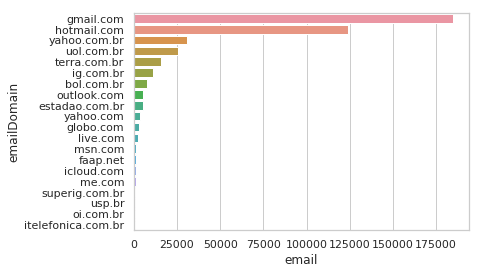

In [39]:
# plot top 20 domains
sns.set(style="whitegrid")
ax = sns.barplot(x="email", y="emailDomain", data=group_df.head(20))

In [40]:
# Classify emails different from gmail and hotmail in others
hardbounce_2["emailDomain_cat"] =  hardbounce_2["emailDomain"].apply(lambda x: 'others' if (x != 'gmail.com' and x != 'hotmail.com') else x)

In [41]:
# count by domain categorized
group_df = pd.DataFrame(hardbounce_2.groupby('emailDomain_cat').count()['email'].sort_values(ascending=False)).reset_index()

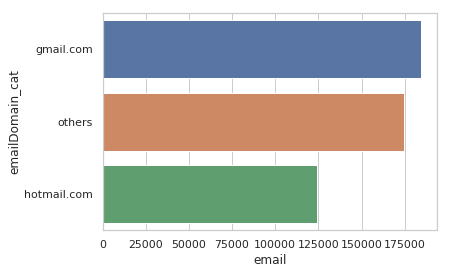

In [42]:
# plot domains
sns.set(style="whitegrid")
ax = sns.barplot(x="email", y="emailDomain_cat", data=group_df)

In [43]:
# Variable Y distribution by domain category
aux_functions.freqTable(
    [hardbounce_2["emailDomain_cat"]]
    ,[hardbounce_2["flgHardBounce_n"]]
    ,True
    ,"index"
)

flgHardBounce_n,0,1
emailDomain_cat,,
gmail.com,0.975271,0.024729
hotmail.com,0.681972,0.318028
others,0.665049,0.334951
Total,0.787886,0.212114


## Split domain pieces

### Split first domain piece

In [44]:
hardbounce_2['emailDomainPiece1'] = hardbounce_2['emailDomain'].apply(aux_functions.getPiece1EmailDomain)

In [45]:
# count by domain piece
group_df = pd.DataFrame(hardbounce_2.groupby('emailDomainPiece1').count()['email'].sort_values(ascending=False)).reset_index()

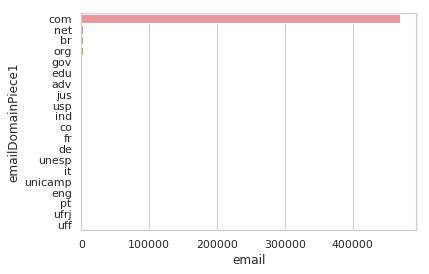

In [46]:
# plot top 20 domains
sns.set(style="whitegrid")
ax = sns.barplot(x="email", y="emailDomainPiece1", data=group_df.head(20))

In [47]:
# Create category with domains different from .com because this represents the majority of the dataset rows
hardbounce_2["emailDomainPiece1"] =  hardbounce_2["emailDomainPiece1"].apply(lambda x: 'others' if x != 'com' else x)

In [48]:
# Variable Y distribution by domain piece
aux_functions.freqTable(
    [hardbounce_2["emailDomainPiece1"]]
    ,[hardbounce_2["flgHardBounce_n"]]
    ,True
    ,"index"
)

flgHardBounce_n,0,1
emailDomainPiece1,,
com,0.793368,0.206632
others,0.593077,0.406923
Total,0.787886,0.212114


### Split second domain piece

In [49]:
hardbounce_2['emailDomainPiece2'] = hardbounce_2['emailDomain'].apply(aux_functions.getPiece2EmailDomain)

In [50]:
# count by domain piece
group_df = pd.DataFrame(hardbounce_2.groupby('emailDomainPiece2').count()['email'].sort_values(ascending=False)).reset_index()

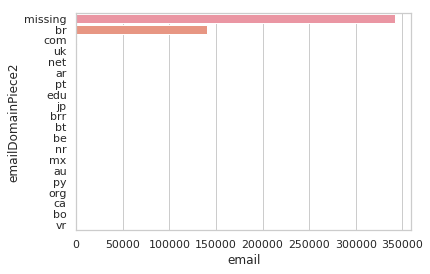

In [51]:
# plot top 20 domains
sns.set(style="whitegrid")
ax = sns.barplot(x="email", y="emailDomainPiece2", data=group_df.head(20))

In [52]:
# Create category with domains different from .br and missing because they represents the majority of the dataset rows
hardbounce_2["emailDomainPiece2"] =  hardbounce_2["emailDomainPiece2"].apply(lambda x: 'others' if (x != 'missing' and x != 'br') else x)

In [53]:
# Variable Y distribution by domain piece
aux_functions.freqTable(
    [hardbounce_2["emailDomainPiece2"]]
    ,[hardbounce_2["flgHardBounce_n"]]
    ,True
    ,"index"
)

flgHardBounce_n,0,1
emailDomainPiece2,,
br,0.682245,0.317755
missing,0.832001,0.167999
others,0.539600,0.460400
Total,0.787886,0.212114


## Calculates the percentage of numbers in e-mail user

In [54]:
hardbounce_2['percNumbersInEmailUser'] = hardbounce['email'].apply(aux_functions.getEmailUser).apply(aux_functions.percentageNumberInStr)

In [55]:
# Describe 
hardbounce_2['percNumbersInEmailUser'].describe()

count    483396.000000
mean          0.044993
std           0.114386
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: percNumbersInEmailUser, dtype: float64

In [56]:
hardbounce_2['hasNumberInEmailUser'] = hardbounce_2['percNumbersInEmailUser'].apply(lambda x : 1 if x > 0 else 0)

In [57]:
aux_functions.freqTable(
    [hardbounce_2["hasNumberInEmailUser"]]
    ,[hardbounce_2["flgHardBounce_n"]]
    ,True
    ,"index"
)

flgHardBounce_n,0,1
hasNumberInEmailUser,,
0,0.777874,0.222126
1,0.829098,0.170902
Total,0.787886,0.212114


## Calculate character qty in e-mail user

In [58]:
hardbounce_2['emailUserCharQty'] = hardbounce_2['email'].apply(lambda x : len(aux_functions.getEmailUser(x)))

In [60]:
# Describe 
hardbounce_2['emailUserCharQty'].describe()

count    483396.000000
mean         11.815222
std           3.855330
min           0.000000
25%           9.000000
50%          12.000000
75%          14.000000
max          51.000000
Name: emailUserCharQty, dtype: float64

## Save dataset

In [64]:
hardbounce_2[['emailDomain_cat', 'emailDomainPiece1', 'emailDomainPiece2', 'regDate_n', 'birthDate_n'
             ,'monthsSinceRegDate', 'age', 'percNumbersInEmailUser', 'hasNumberInEmailUser', 'emailUserCharQty'
             ,'flgHardBounce_n']].head(10)

,emailDomain_cat,emailDomainPiece1,emailDomainPiece2,regDate_n,birthDate_n,monthsSinceRegDate,age,percNumbersInEmailUser,hasNumberInEmailUser,emailUserCharQty,flgHardBounce_n
0,hotmail.com,com,missing,2016-11-02,2016-11-02,36,47,0.000000,0,16,1
1,gmail.com,com,missing,2013-07-16,1979-04-25,76,40,0.285714,1,7,0
2,hotmail.com,com,missing,2018-04-21,2018-04-21,19,47,0.000000,0,15,0
3,hotmail.com,com,missing,2016-06-07,2016-06-07,41,47,0.000000,0,13,1
4,others,com,br,2018-02-02,1951-08-29,21,68,0.000000,0,8,0
5,gmail.com,com,missing,2018-01-23,2018-01-23,22,47,0.000000,0,12,0
6,others,com,br,2017-12-12,2017-12-12,23,47,0.000000,0,13,0
7,gmail.com,com,missing,2019-05-10,1970-08-15,6,49,0.000000,0,13,0
8,others,com,br,2019-05-20,2001-01-01,6,18,0.111111,1,9,0
9,gmail.com,com,missing,2017-09-20,2017-09-20,26,47,0.000000,0,6,0


In [66]:
hardbounce_2[['emailDomain_cat', 'emailDomainPiece1', 'emailDomainPiece2', 'regDate_n', 'birthDate_n'
             ,'monthsSinceRegDate', 'age', 'percNumbersInEmailUser', 'hasNumberInEmailUser', 'emailUserCharQty'
             ,'flgHardBounce_n']].to_csv('datasets/hardbounce_featureEngineering.csv', sep=';',index=False)